# Problem Statement-


Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
Data Description: Murder -- Muder rates in different places of United States Assualt- Assualt rate in different places of United States UrbanPop - urban population in different places of United States Rape - Rape rate in different places of United States


# Kmeans

In [116]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [117]:
crime_data=pd.read_csv("crime_data.csv")

In [118]:
#Displaying first few records 
crime_data.head() 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [119]:
#renaming a column
crime_data.rename({"Unnamed: 0":"states"},axis=1,inplace=True)
crime_data.head(2)

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [120]:
# we get to know how many data point and column we have in our data frame
crime_data.shape   

(50, 5)

In [121]:
#checking for null values 
crime_data.isna().sum()

states      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

**Note-We don't have null values in our data set** 

In [122]:
#gettinging the general idea about the data
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000




**Note - The range of data in each column is large so we apply standard scaler to get it in same range** 





### Converting data into standard scaler 

In [123]:
std=StandardScaler()

crime_data_std=std.fit_transform(crime_data.iloc[:,1:])

crime_data_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### Ploting the data

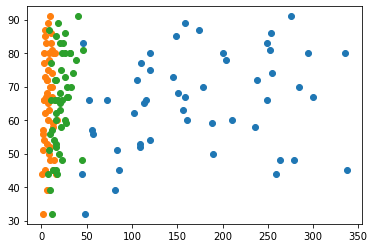

In [125]:


plt.scatter(x=crime_data['Assault'],y=crime_data['UrbanPop'])

plt.scatter(x=crime_data['Murder'],y=crime_data['UrbanPop'])

plt.scatter(x=crime_data['Rape'],y=crime_data['UrbanPop'])



# Model Building

### creating a model

In [126]:
#creating onbejct and specifying parameters

km=KMeans(n_clusters=3,random_state=0,max_iter=100)

km.fit(crime_data_std)

#we will check dist within clister sum of squares

km.inertia_

80.08886132199619

### Checking what number of cluster give minimum value of wcss

In [127]:
## we will find wcss for number of cluster varying from 1 to 11
wcss=[]
for i in range(1,11):
        model=KMeans(n_clusters=i,random_state=0)
        model.fit(crime_data_std)
        wcss.append(model.inertia_)
        

### PLoting the value of wcss on graph ,by elbow method we can approximately decide numbe rof clusters

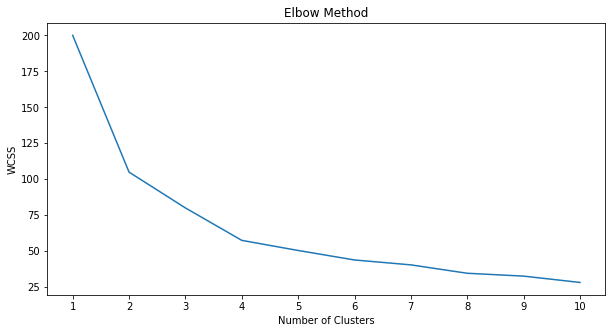

In [128]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,markersize=12)
plt.xticks(range(1,11)) # number / range of x axis
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Note - From above graph we can say that number of clusters for data is 4 which gives fairlly less WCSS**

## Making  Final Model with number of cluster=4

### Final model 

In [129]:
final_model=KMeans(n_clusters=4,random_state=0)
final_model.fit(crime_data_std)
final_model.inertia_

57.55425863091106

In [130]:
## Creating clusterid column to see which point is assign to which cluster
crime_data["Cluster_id"]=final_model.labels_
print(final_model.labels_)

[3 1 1 3 1 1 0 0 1 3 0 2 1 0 2 0 2 3 2 1 0 1 2 3 1 2 2 1 2 0 1 1 3 2 0 0 0
 0 0 3 2 3 1 0 2 0 0 2 2 0]


In [132]:
#displaying records in cluster 0
crime_data[crime_data["Cluster_id"]==0]

,states,Murder,Assault,UrbanPop,Rape,Cluster_id
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [133]:
#displaying records in cluster 1
crime_data[crime_data["Cluster_id"]==1]

,states,Murder,Assault,UrbanPop,Rape,Cluster_id
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [134]:
#displaying records in cluster 2
crime_data[crime_data["Cluster_id"]==2]

,states,Murder,Assault,UrbanPop,Rape,Cluster_id
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [135]:
#displaying records in cluster 3
crime_data[crime_data["Cluster_id"]==3]

,states,Murder,Assault,UrbanPop,Rape,Cluster_id
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

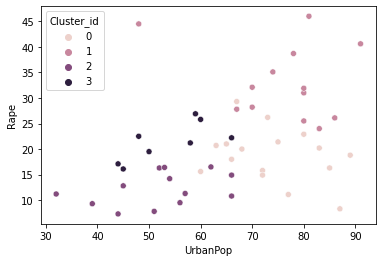

In [172]:
cluster_center=final_model.cluster_centers_
sns.scatterplot(x=crime_data['UrbanPop'],y=crime_data['Rape'],data=crime_data,hue='Cluster_id')

## Inference:

In [169]:
crime_data.groupby('Cluster_id').agg(['mean','min','max'])

Murder                Assault             UrbanPop          \
                 mean  min   max        mean  min  max       mean min max   
Cluster_id                                                                  
0            5.656250  3.2   8.5  138.875000   46  238  73.875000  60  89   
1           10.815385  7.9  15.4  257.384615  178  335  76.000000  48  91   
2            3.600000  0.8   9.7   78.538462   45  120  52.076923  32  66   
3           13.937500  8.8  17.4  243.625000  188  337  53.750000  44  66   

                 Rape              
                 mean   min   max  
Cluster_id                         
0           18.781250   8.3  29.3  
1           33.192308  24.0  46.0  
2           12.176923   7.3  16.5  
3           21.412500  16.1  26.9

**Cluster 0 has states which has average murder,assoult,rape 5,138,18**

**Cluster 1 has states which has average murder,assoult,rape 10,257,33**

**Cluster 2 has states which has average murder,assoult,rape 3,78,12**

**Cluster 3 has states which has average murder,assoult,rape 13,243,21**